In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/jupyter/customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# inspect ther data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["Totalcharges"]=df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Totalcharges        0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

#  converted 0 and 1 values of senior citizen to yes/no to make to understand

In [12]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"


df["SeniorCitizen"] =df["SeniorCitizen"].apply(conv)       

In [13]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Totalcharges
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,820.50
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,1949.40
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,301.90
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,3046.05
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,3487.95


[]

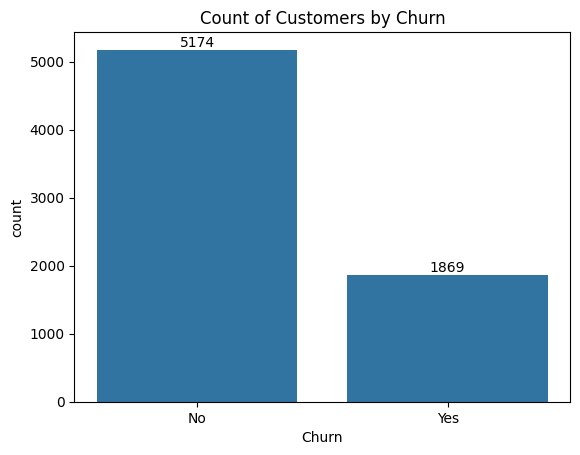

In [14]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.plot()

In [15]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb
# plt.pie(df["Churn"])
# plt.show()

,Churn
Churn,
No,5174
Yes,1869


In [16]:
gb.index

Index(['No', 'Yes'], dtype='object', name='Churn')

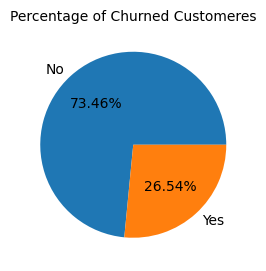

In [17]:
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels=gb.index,autopct='%1.2f%%')
plt.title("Percentage of Churned Customeres",fontsize=10)
plt.show()

In [18]:
# from the given pie chat we conclode that 26.54 % our customers have churne out
# now let's explore the reason behind it

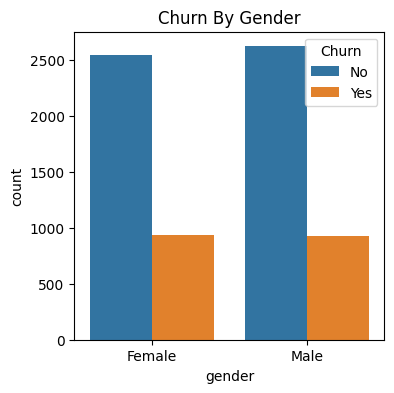

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

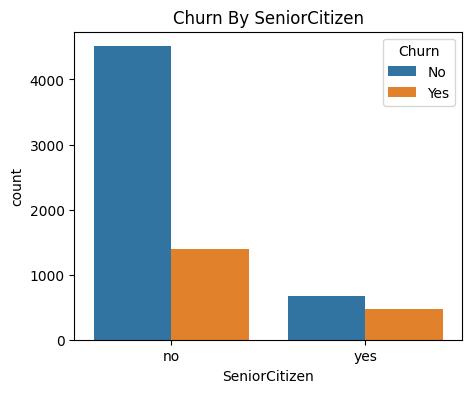

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title("Churn By SeniorCitizen")
plt.show()

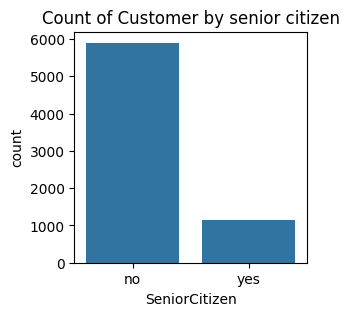

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen",data=df)
plt.title("Count of Customer by senior citizen")
plt.show()

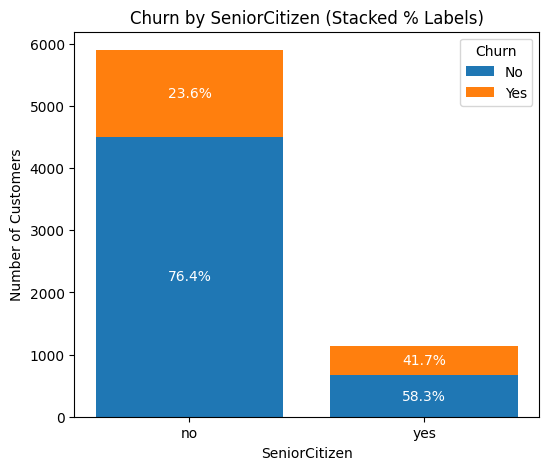

In [22]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your dataframe and 'SeniorCitizen' and 'Churn' are columns

# 1. Calculate counts of each combination
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# 2. Calculate total counts per SeniorCitizen group
totals = counts.sum(axis=1)

# 3. Calculate percentage for each Churn category in each SeniorCitizen group
percentages = counts.divide(totals, axis=0) * 100

# 4. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 5))

# Bottom for stacking bars
bottom = np.zeros(len(counts))

colors = ['#1f77b4', '#ff7f0e']  # You can customize colors here

for i, churn_status in enumerate(counts.columns):
    ax.bar(counts.index, counts[churn_status], bottom=bottom, label=churn_status, color=colors[i])
    # Add percentage labels on the bars
    for j, val in enumerate(counts[churn_status]):
        if val > 0:
            percentage = percentages.iloc[j, i]
            ax.text(counts.index[j], bottom[j] + val/2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
    bottom += counts[churn_status].values

ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn by SeniorCitizen (Stacked % Labels)')
ax.legend(title='Churn')
plt.show()


 # comparative a greated percentage of people in senior citizen category have churned

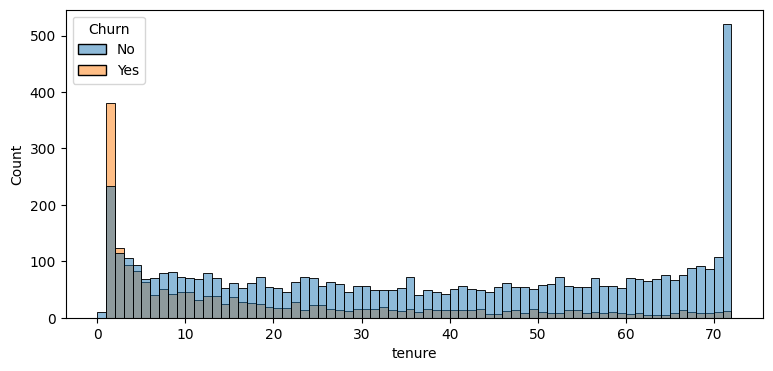

In [23]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

[]

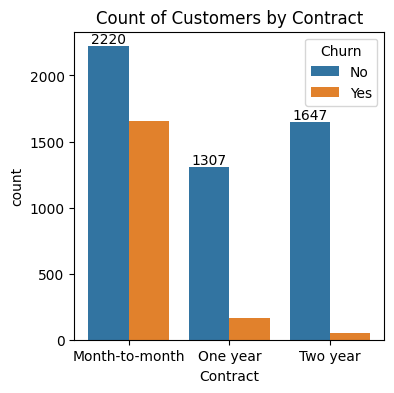

In [24]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.plot()

In [25]:
# people who have month to contract are likely to churn then from those who have 1 or 2 year or contractora

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Totalcharges'],
      dtype='object')

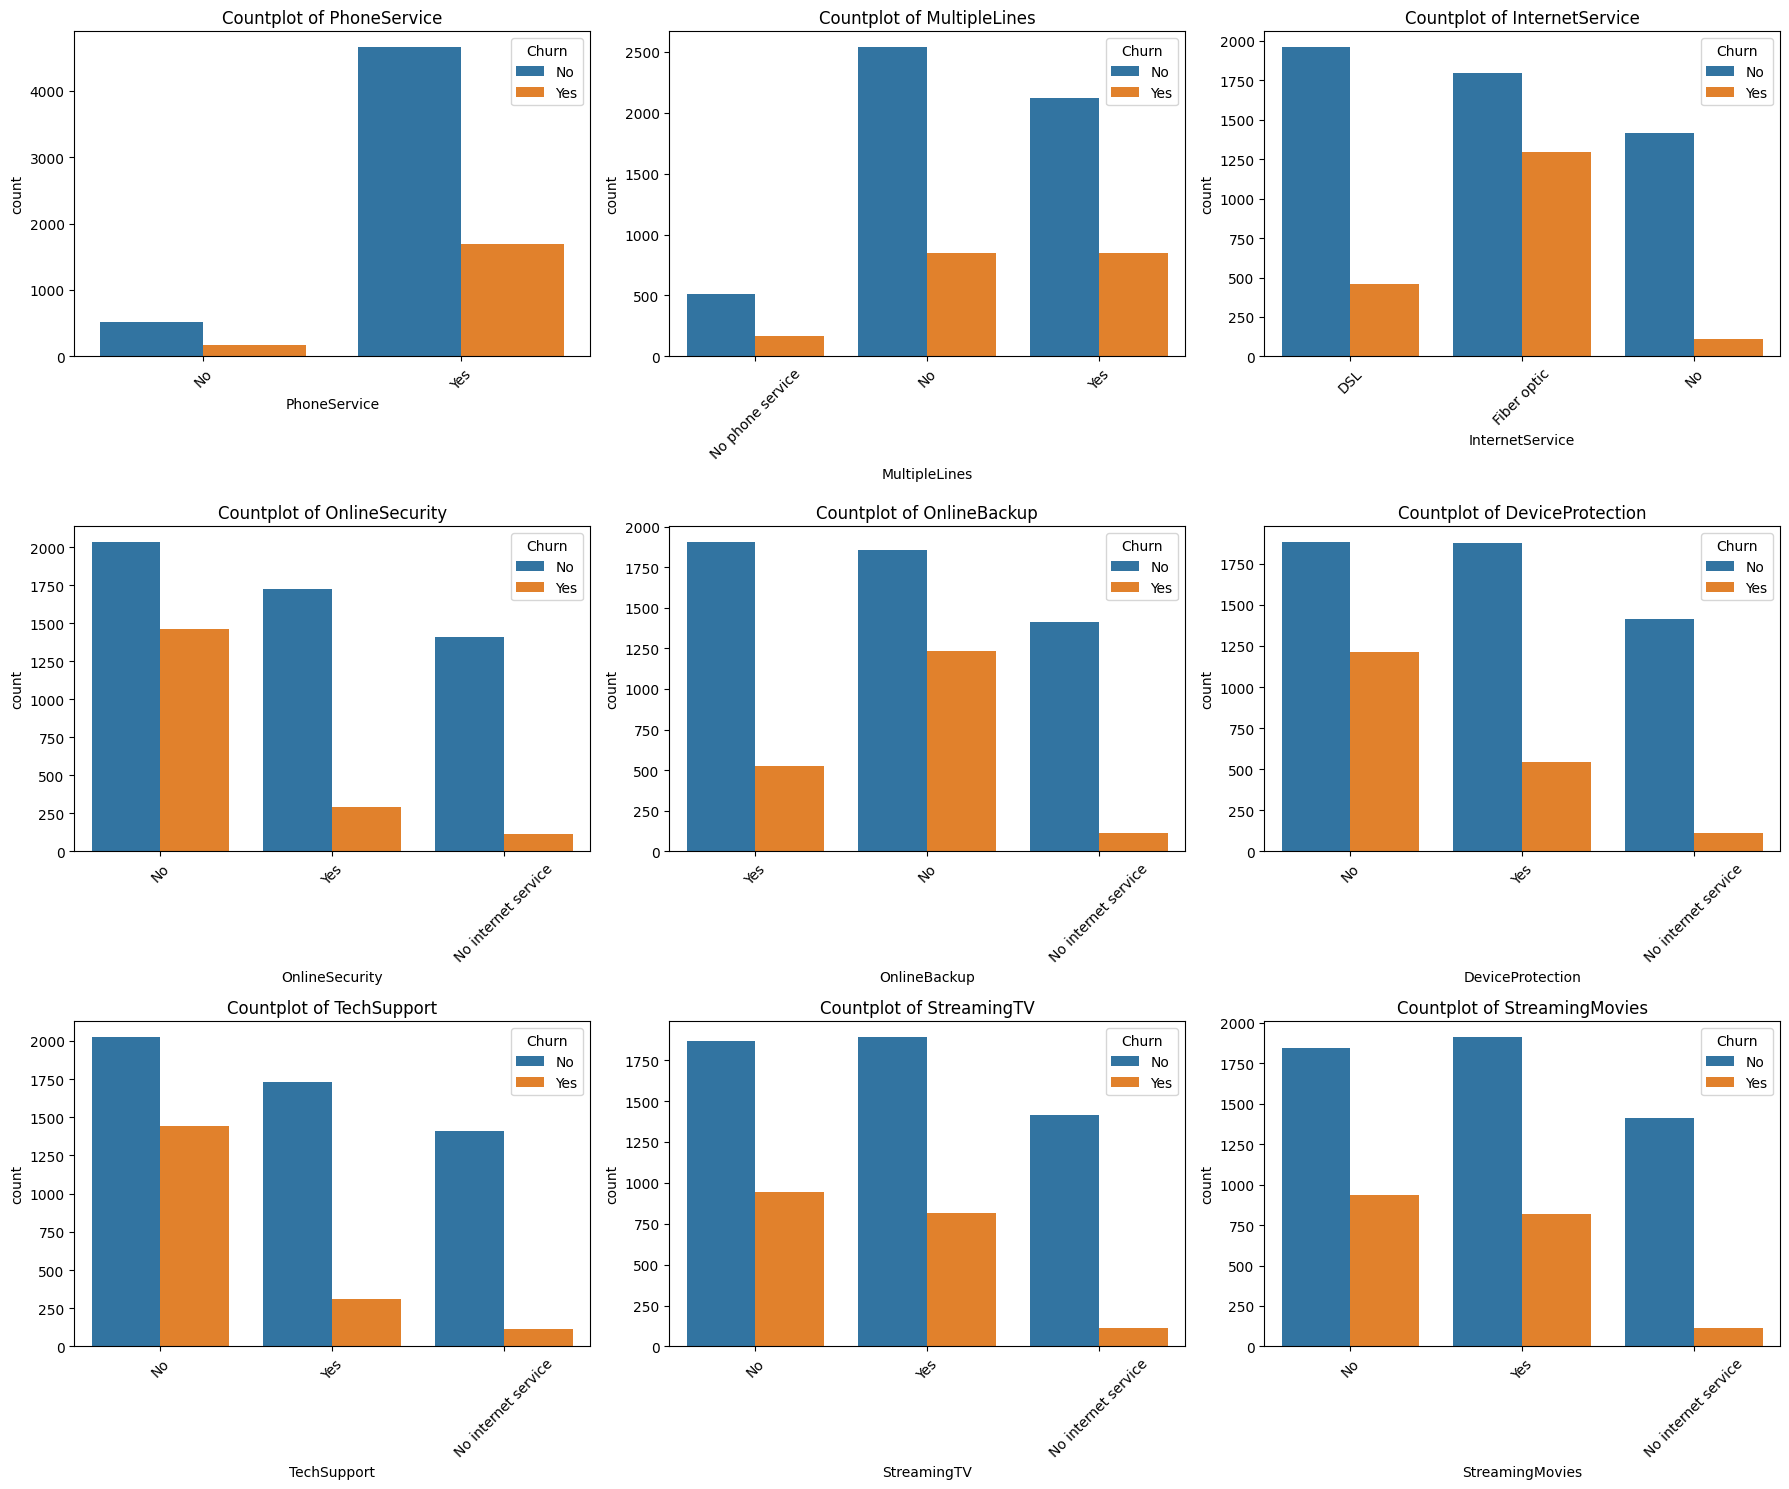

In [27]:


# Example: Load your dataframe (replace with your actual data)
# df = pd.read_csv('your_data.csv')

# Your columns of interest
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))  # 3x3 grid for 9 plots

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels for readability

plt.tight_layout()
plt.show()


 # This data visualization explores customer churn in relation to various telecom services. Features like PhoneService, InternetService, OnlineSecurity, and TechSupport show higher churn rates (orange bars) for customers without or with poor service options. Services such as StreamingTV and StreamingMovies also indicate increased churn among users. Overall, lack of essential services correlates with higher customer churn.


[]

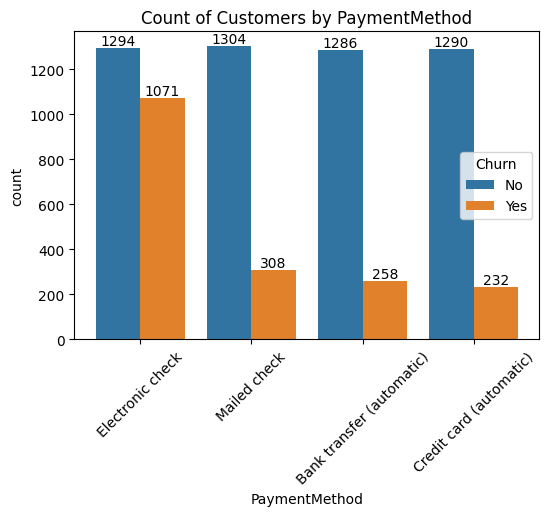

In [28]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation=45)
plt.plot()

# customers is likely to churn when he is using electronic chek as a payment method